### NetID: sa857

# Autoencoders

This code includes implementations of various simple autoencoders using the Keras front end to TensorFlow.
You should first run all of the code on the MNIST data, and gain a basic understanding of what everything is doing. 
Then, carry out the simple experiments described in Problem 2 of the assignment. For 2(b) (15 points), you need to run everything on the Fashion MNIST data and fill in the cells marked _your documentation/description goes here_ with documentation of the code or descriptions of the results. You should also include more plots of images and weights, as described in the assignment writeup. For 2(c) (10 points) you will fit a series of networks, varying the dimension of the bottleneck.

The starter code for this assignment is from [https://github.com/ardendertat/Applied-Deep-Learning-with-Keras](https://github.com/ardendertat/Applied-Deep-Learning-with-Keras). For Keras documentation, see [https://keras.io](https://keras.io).



## Problem 2 (a) Gradients for a simple autoencoder (5 points)

Calculate the gradients of a simple autoencoder, as described in the pdf assignment.

Working:

![Autoencoder gradients 1](./autoencoder_working_1.png)

![Autoencoder gradients 2](./autoencoder_working_2.png)

Final answers in LaTeX (fully expanded except dL/dx^):

Layer 2

$$\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial \hat{x}}$$

$$\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial \hat{x}} h^{T}$$

$$\frac{\partial L}{\partial h} = \frac{\partial L}{\partial \hat{x}} W_2^{T}$$

Layer 1

$$\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial \hat{x}} W_2^{T}$$

$$\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial \hat{x}} W_2^{T} X^{T}$$

Problems with this architecture: 

1. The simple autoencoder is shallow, which is too simple a model with low complexity. In other words it's got low variance and high bias. For real applications (i.e. not tidy/clean data like MNIST), it will not be able to learn the structure well
2. Perhaps deep autoencoders can achieve greater compression, because each hidden layer can represent some feature of the data (e.g. for faces it could be nose, or mouth shape), which is then compressed into the code. With shallow encoders this may not be possible, since the one code/hidden layer has to maintain representation of many features. Possible proof by empirical testing: part 2(c)

## Problem 2 (b) Run on Fashion MNIST (15 points)

Run all of the code below, first on MNIST, then change the data set to Fashion MNIST. Comment on what all of the code does and your findings, as indicated below.


In [1]:
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.regularizers import l1
from keras.optimizers import Adam

## Utility functions

_[your documentation goes here]_

- the function accepts the autoencoder model as input, along with params n and dims for the number of samples and the dimension of each image to plot e.g. 28 * 28
- first it plots the original images from the test data
- then it reshapes the x^ generated by the autoencoder back from 784 to the specified dimensions (i.e. 28 * 28)
- the reconstructed data is then plotted side by side with the test images


In [2]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    plt.figure(figsize=(2*n, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()


## Read the data
_[your documentation goes here]_

- MNIST data set is part of the keras package, it returns train and test data tuples
- the data is converted to RGB pixel values (between 0 and 255) and then reshaped into vectors of 784 pixels (28 * 28)

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Shallow autoencoder
_[your documentation goes here]_

- input size is 784 because that's the dimension of each X data point
- code size of 32 is the size it is being compressed to in the middle hidden layer 

---

- Input() function creates the first input layer of 784
- the Dense() function creates hidden layer of that code size, using relu activation function, and fully connected/densely connected to preceding input layer
- the Dense() in the next line creates the final layer but it applies the sigmoid to its linear activation output 

---

- Model() puts all the layers together 
- the model uses adam optimizer to maintain separate learning rate for each parameter (converges faster) and also a specific loss function
- fit() is used to actually start the training process

In [5]:
input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))
code = Dense(code_size, activation='relu')(input_img)
output_img = Dense(input_size, activation='sigmoid')(code)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.3274
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2902
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2858
Epoch 4/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.2842
Epoch 5/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.2835


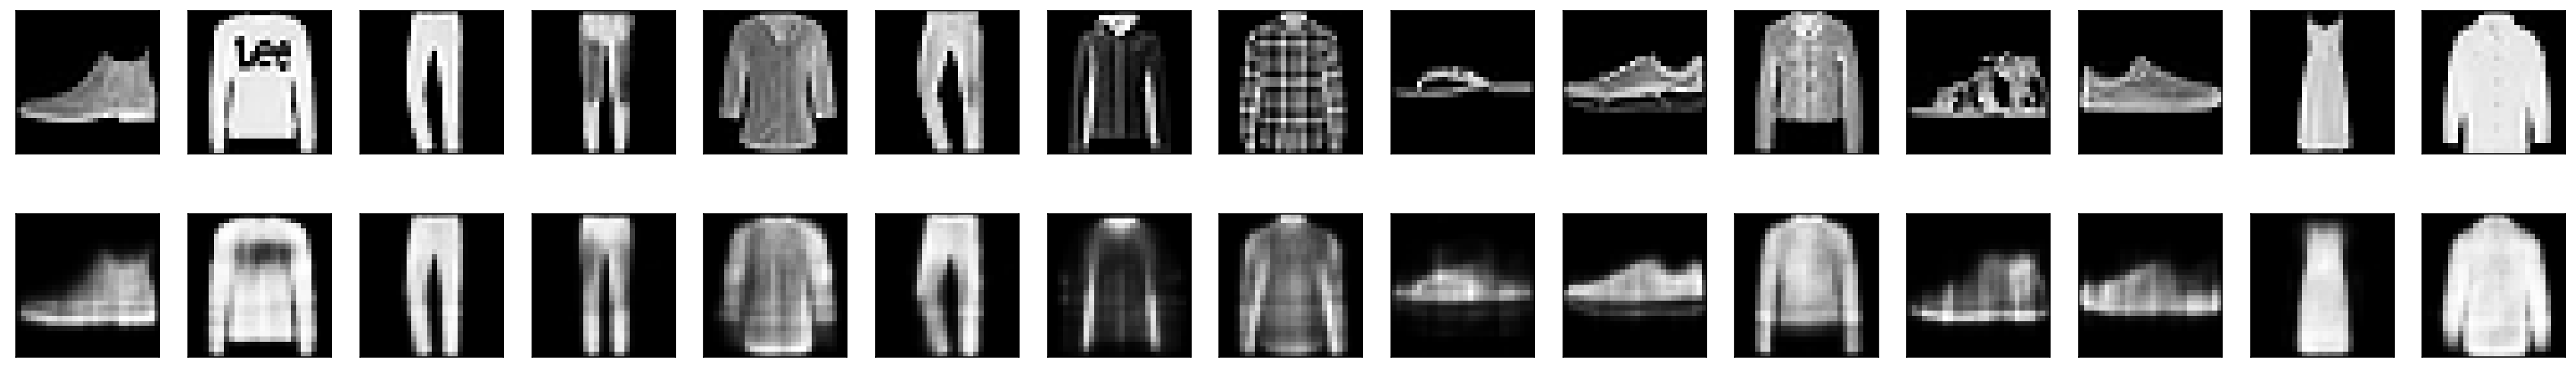

In [6]:
plot_autoencoder_outputs(autoencoder, 15, (28, 28)) # MODIFY CODE TO PRINT MORE OUTPUTS

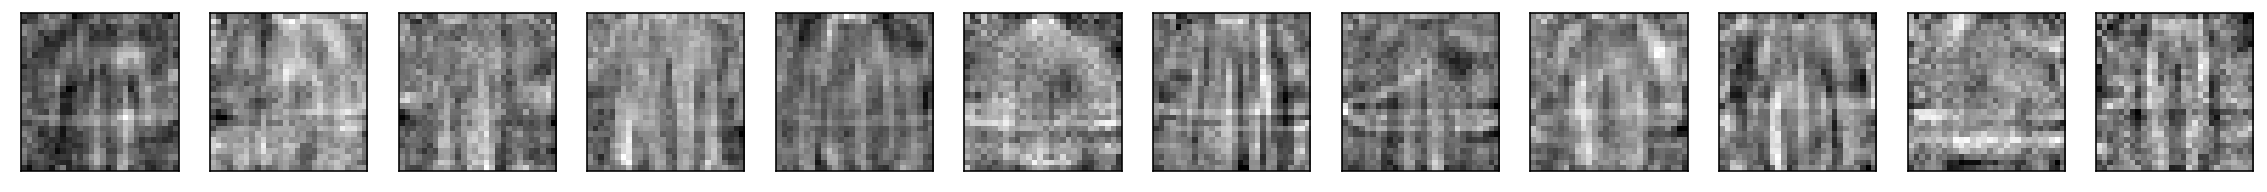

In [9]:
weights = autoencoder.get_weights()[0].T

n = 12 # MODIFY CODE TO PRINT MORE WEIGHTS
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+20].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Discussion of above results
_[your description goes here]_

- MNIST
    - the reconstruction is quite good, which means the autoencoder has learned some underlying information about the handwritten digits which can be compressed to 32 dimensions instead of 784, which is really impressive. 
    - there isn't much reconstruction error, in fact reconstruction smooths out some of the digits to get them closer to a more standard form e.g. the imperfections in the seventh image (bottom of the 4) and the tenth image (the mark inside the loop of the 9) have been removed.
    - the weights learned by the encoder, when visualized, aren't really meaningful for humans to understand, but they show some sort of generalized pattern that captures the digits 
- Fashion MNIST
    - Reconstruction is not that good. It is quite blurry and some of the features are lost. For example, there are no laces on the shoes, and lack of collar on the shirt
    - Unlike MNIST the weight visualizations are more intelligible: you can make out the shape of a shirt or shoes in them

## Deep Autoencoder
_[your documentation goes here]_

- input size is 784 because that's the dimension of each X data point
- an additional pair of hidden layers of dimension 128 have been added this time to increase the model complexity and train a deep autoencoder
- code size of 32 is the size it is being compressed to in the middle hidden layer 

---

- Input() function creates the first input layer of 784
- the first call to Dense() creates the hidden layer, which is fully connected to the input layer
- the next call to Dense() function creates hidden layer of that code size, connected to the preceding hidden layer 
- the next layer constructions are symmetrical about the code layer
- the final layer applies the sigmoid to its linear activation output

---

- Model() puts all the layers together 
- the model uses adam optimizer to maintain separate learning rate for each parameter (converges faster) and also a specific loss function
- fit() is used to actually start the training process
- the model is trained for more epochs (10 instead of 5), probably because it is a complex model, and more training rounds are required for the weights to be updated optimally

In [10]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.3114
Epoch 2/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.2853
Epoch 3/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.2805
Epoch 4/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2780
Epoch 5/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.2764
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.2753
Epoch 7/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.2745
Epoch 8/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2738
Epoch 9/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.2733
Epoch 10/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.2729


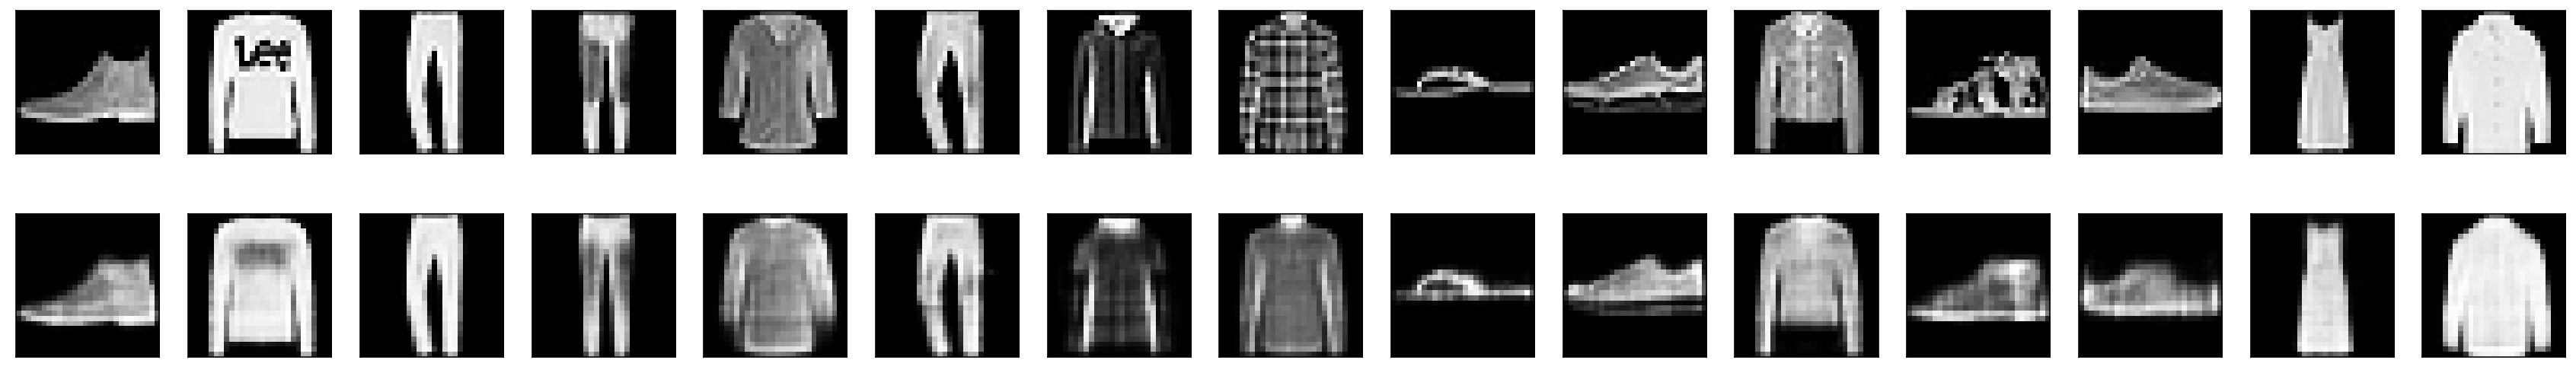

In [11]:
plot_autoencoder_outputs(autoencoder, 15, (28, 28)) # MODIFY CODE TO PRINT MORE

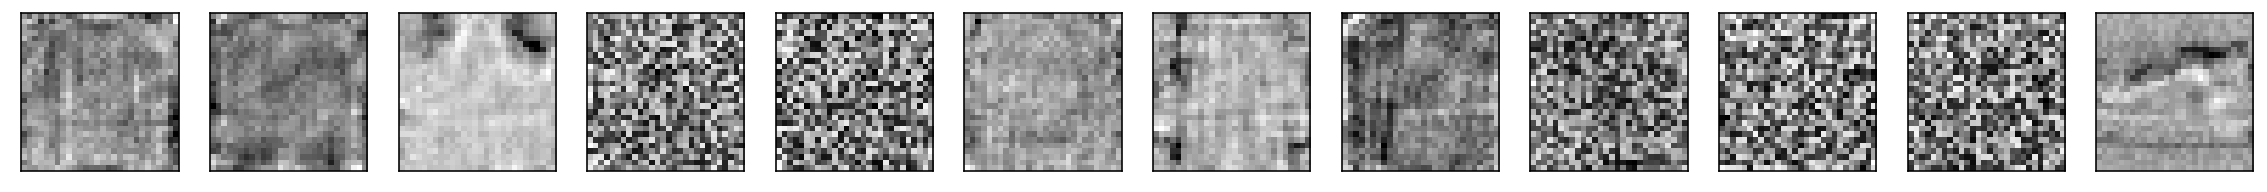

In [12]:
weights = autoencoder.get_weights()[0].T

n = 12 # MODIFY CODE TO PRINT MORE
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

## Discussion of above results
_[your description goes here]_

- MNIST
    - I don't really notice much of a difference between this reconstruction and the shallow reconstruction. Both have done an equally good job
    - But there is much more difference in the weights visualizations. The weights for this one are more grainy (fourth and fifth) and have specific visual elements (the hole in the sixth and ninth) which is strange because the actual digits they represent (1 and 5) are quite different. 
    - I think the autoencoder is learning some of the noise from the input images in its weights, but in general it is hard to interpret exactly what the weights are doing
- Fashion MNIST
    - The reconstructions miiight be slightly better, but they are very close to the shallow autoencoder 
    - The weight visualizations are very different. Some of thjem are grainy and have specific visual elements. The same observation made for the MNIST weights applies here. 

## Denoising autoencoder
_[your documentation goes here]_


- gaussian noise is being added to the training data
- this is to prevent the autoencoder from overfitting and memorizing the data
- the noise forces the autoencoder to learn useful structure in the data 
- the code is plotting the original training samples and the noised training samples side by side

---

- in the next code block, the neural net is being setup
- "=>" means fully connected: same as before, there is input layer => hidden layer => code hidden layer => symmetrical hidden layer => output layer. These are of the specified dimensions in the code
- then the model params (optimizer, loss function) are set and the training begins, same as before
- Again, 10 epochs might be to sufficiently train the weights for this more complex model

---

- in the next code block, three sets of images are plotted: the original sample inputs, the added noise inputs, and the reconstructions of those samples
- the autoencoder successfully learns the underlying structure, because the noise is no longer part of the reconstruction, which is quite close to the original inputs. However, some of the reconstructions are slightly blurry which might be related to the removal of noise e.g. 
    - MNIST: the 4 and 7 digits
    - Fashion MNIST: the shirts

---

- the next code block visualizes the weights 
- there are still some grainy weight visualizations, similar to the deep autoencoder 
- but overall, there seems to be more structure in the weights, since the shapes e.g. ridges are more pronounced. this might suggest the model is not overfitting the data
    - Fashion MNIST: overall less of the weights look like the clothes/shoes: some look more unintelligible. This might be due to the fact that the autoencoder is learning some other kind of structure in the data 

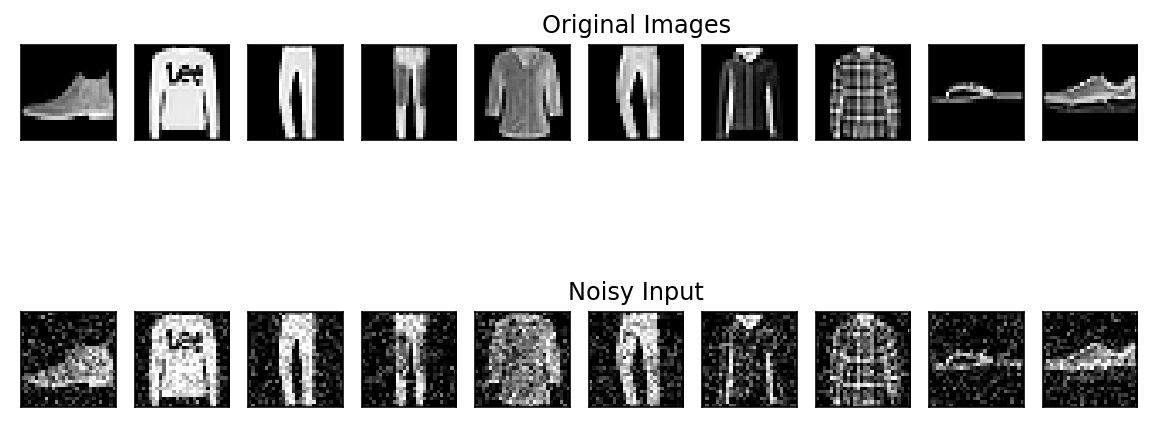

In [14]:
noise_factor = 0.20
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 10 # MODIFY CODE TO PRINT MORE
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

In [15]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.3177
Epoch 2/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.2914
Epoch 3/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.2863
Epoch 4/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2840
Epoch 5/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2824
Epoch 6/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2814
Epoch 7/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.2806
Epoch 8/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2800
Epoch 9/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2795
Epoch 10/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2791


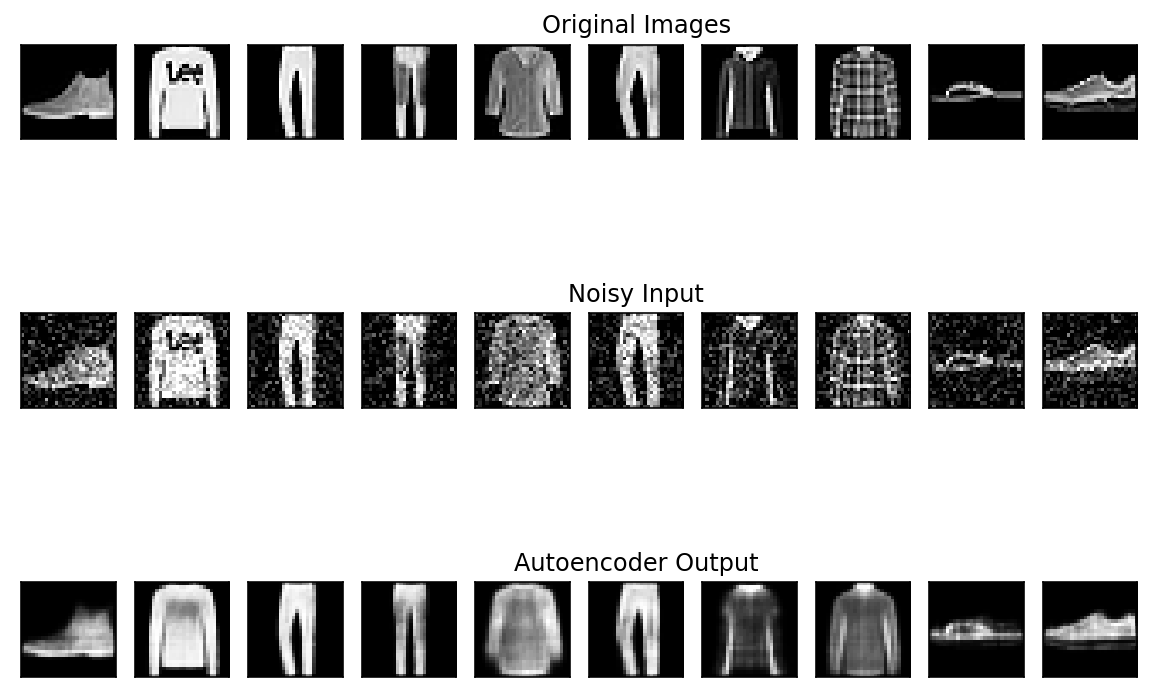

In [16]:
# MODIFY CODE TO PRINT MORE RECONSTRUCTED IMAGES
n = 10
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')

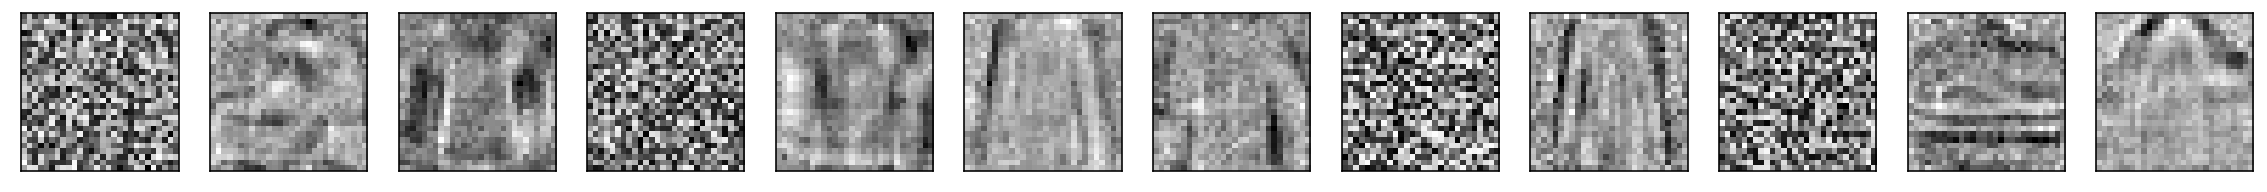

In [17]:
weights = autoencoder.get_weights()[0].T

n = 12 # MODIFY CODE TO PRINT MORE WEIGHTS
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


## Discussion of above results
_[your description goes here]_

- already answered at the start of this question, please scroll above

## Problem 2 (c): Training a series of shallow networks of varying complexity (10 points)

Your final task is to train a sequence of shallow networks, varying the code size parameter.
Plot the training error and test error as a function of the code size. Describing your findings. Interpret them in terms of the bias/variance tradeoff. 


In [26]:
def trainShallowEncoder(code_size: int):
    input_size = 784

    input_img = Input(shape=(input_size,))
    code = Dense(code_size, activation='relu')(input_img)
    output_img = Dense(input_size, activation='sigmoid')(code)

    autoencoder = Model(input_img, output_img)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    history = autoencoder.fit(x_train, x_train, epochs=5, validation_data=(x_test, x_test))
    return history

In [27]:
code_sizes = np.arange(5, 100, 15)
test_errors = []
train_errors = []

In [ ]:
for size in code_sizes:
    history = trainShallowEncoder(size)
    train_errors.append(history.history['loss'][-1])
    test_errors.append(history.history['val_loss'][-1])

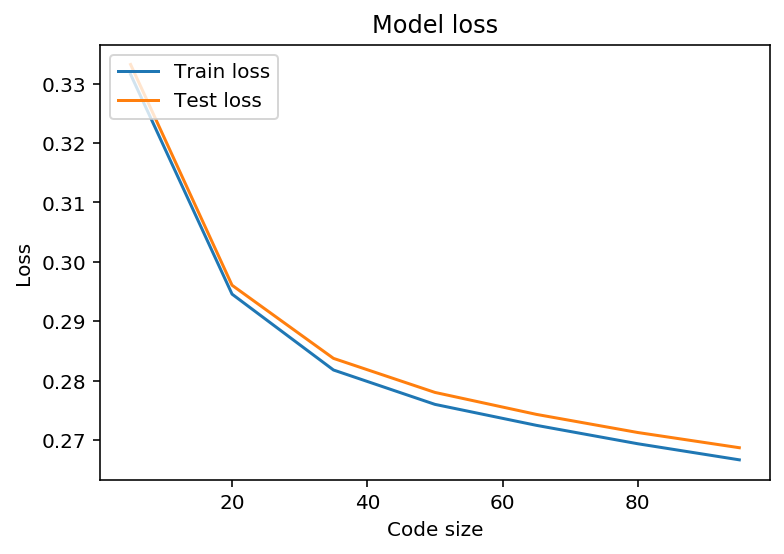

In [33]:
plt.plot(code_sizes, train_errors)
plt.plot(code_sizes, test_errors)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Code size')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.show()

In [34]:
code_sizes

array([ 5, 20, 35, 50, 65, 80, 95])

- As code size increases, both the train error and test error decreases
- The test error is slightly higher than the train error, which is to be expected on novel input to the autoencoder, however it is not significantly worse, which means the shallow autoencoder is learning the data relatively well 
- Model complexity increases as code size increases; so variance is increasing and bias is decreasing. Sudden drop in error around code size of 20 may be due to decrease in bias. Increase in test error around code size of 100 may be due to increase in variance.